# Conversion Rate Analysis

---

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing and Exploring Data

In [152]:
data = pd.read_csv('conversion_data.csv')

In [153]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [155]:
data.isnull().sum().to_frame()

,0
country,0
age,0
new_user,0
source,0
total_pages_visited,0
converted,0


In [156]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


### Obesevation

- Relatively young user age
- Ages factor might contians outliers due to the maximum age(123)

In [157]:
uniques = sorted(data['age'].unique())
print(uniques)

[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 77, 79, 111, 123]


## Remove Outliers

In [158]:
data[data['age'] > 70]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
154217,US,73,1,Seo,5,0
192644,US,77,0,Direct,4,0
208969,US,72,1,Direct,4,0
265167,US,79,1,Direct,1,0
295581,UK,111,0,Ads,10,1


In [159]:
data[data['age'] > 80]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [160]:
data = data[data['age'] < 80]

## Exploratory Data Analysis

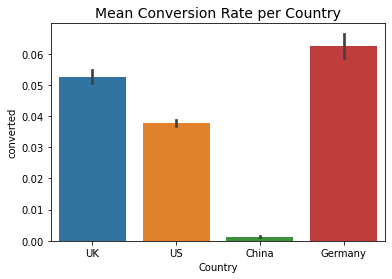

In [171]:
# visualization of average conversion rate by different countries
data_c = data[['country', 'converted']]
grouped_c = data_c.groupby('country').mean()
sns.barplot(x ='country', y ='converted', data = data);
plt.title('Mean Conversion Rate per Country', fontsize=14)
plt.xlabel('Country')
plt.show()

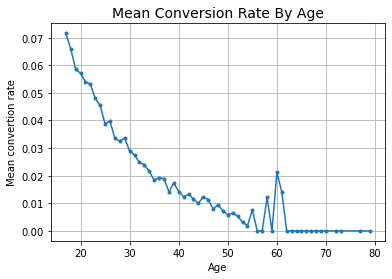

In [172]:
# visulization by ages
grouped_a = data[['age', 'converted']].groupby('age').mean().reset_index()
plt.plot(grouped_a['age'], grouped_a['converted'], '.-')
plt.title('Mean Conversion Rate By Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Mean convertion rate')
plt.grid(True)
plt.show()

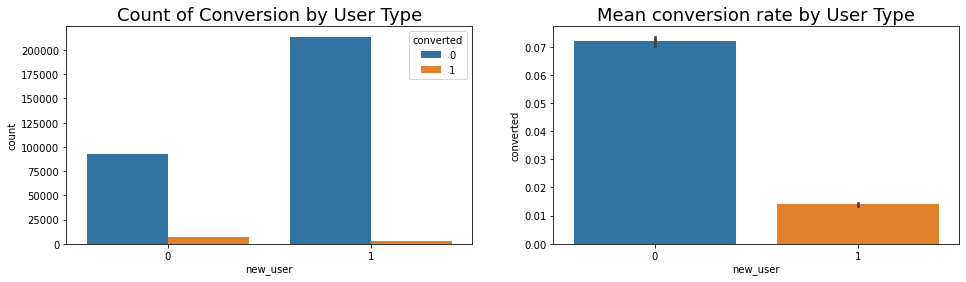

In [126]:
# Visulization by user type (whether new user or not)
grouped_n = data[['new_user', 'converted']].groupby('new_user').mean()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.countplot(data=data, x='new_user', hue='converted',ax=ax[0])
ax[0].set_title('Count of Conversion by User Type',fontsize=18)
sns.barplot(data=data,x='new_user',y='converted',ax=ax[1])
ax[1].set_title('Mean conversion rate by User Type', fontsize=18)
plt.show()

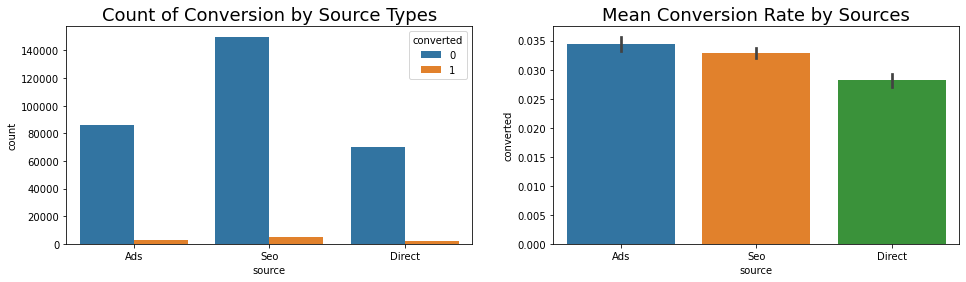

In [129]:
# Visulization by Sources
grouped_s = data[['source', 'converted']].groupby('source').mean()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.barplot(data=data,x='source',y='converted', ax=ax[1])
sns.countplot(data=data,x='source',hue='converted',ax=ax[0])
ax[0].set_title('Count of Conversion by Source Types',fontsize=18)
ax[1].set_title('Mean Conversion Rate by Sources',fontsize=18)
plt.show()

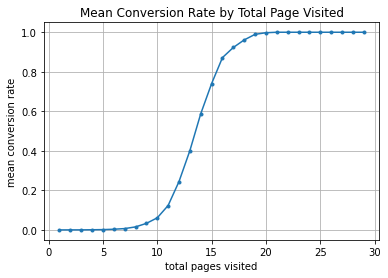

In [179]:
# Visulization by total page visited
grouped_t = data[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()
plt.plot(grouped_t['total_pages_visited'], grouped_t['converted'], '.-')
plt.grid(True)
plt.title('Mean Conversion Rate by Total Page Visited')
plt.xlabel('total pages visited')
plt.ylabel('mean conversion rate')
plt.show()

## Machine Learning